In [415]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [416]:
data = pd.read_csv(r'C:\Users\Pegah Khazaie\Desktop\master.csv')

In [417]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Data Cleaninig

In [418]:
data = data.drop(columns='country-year') #Dropping country-year

In [419]:
data.rename(columns={'suicides/100k pop':'suicides_K','HDI for year':'HDI',' gdp_for_year ($) ':'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita'}, inplace=True)

In [420]:
data.head()

,country,year,sex,age,suicides_no,population,suicides_K,HDI,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers


In [421]:
data.describe()

,year,suicides_no,population,suicides_K,HDI,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [422]:
data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides_K            0
HDI               19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [423]:
data['HDI'] = data['HDI'].fillna(data.HDI.mean()) #Replace missing values with mean of the values of HDI

In [424]:
data.describe(include=['O']) #categorical features 

,country,sex,age,gdp_for_year,generation
count,27820,27820,27820,27820,27820
unique,101,2,6,2321,6
top,Austria,male,35-54 years,"5,240,606,061",Generation X
freq,382,13910,4642,12,6408


In [425]:
data = data.sort_values(by=["suicides_no","age"], ascending=False)
data.head()

,country,year,sex,age,suicides_no,population,suicides_K,HDI,gdp_for_year,gdp_per_capita,generation
20996,Russian Federation,1994,male,35-54 years,22338,19044200,117.30,0.776601,"395,077,301,248",2853,Boomers
21008,Russian Federation,1995,male,35-54 years,21706,19249600,112.76,0.776601,"395,531,066,563",2844,Boomers
21080,Russian Federation,2001,male,35-54 years,21262,21476420,99.00,0.776601,"306,602,673,980",2229,Boomers
21068,Russian Federation,2000,male,35-54 years,21063,21378098,98.53,0.776601,"259,708,496,267",1879,Boomers
21057,Russian Federation,1999,male,35-54 years,20705,21016400,98.52,0.776601,"195,905,767,669",1412,Boomers


In [426]:
data.reset_index(inplace=True,drop=True)
data.head()

,country,year,sex,age,suicides_no,population,suicides_K,HDI,gdp_for_year,gdp_per_capita,generation
0,Russian Federation,1994,male,35-54 years,22338,19044200,117.30,0.776601,"395,077,301,248",2853,Boomers
1,Russian Federation,1995,male,35-54 years,21706,19249600,112.76,0.776601,"395,531,066,563",2844,Boomers
2,Russian Federation,2001,male,35-54 years,21262,21476420,99.00,0.776601,"306,602,673,980",2229,Boomers
3,Russian Federation,2000,male,35-54 years,21063,21378098,98.53,0.776601,"259,708,496,267",1879,Boomers
4,Russian Federation,1999,male,35-54 years,20705,21016400,98.52,0.776601,"195,905,767,669",1412,Boomers


## Visualization

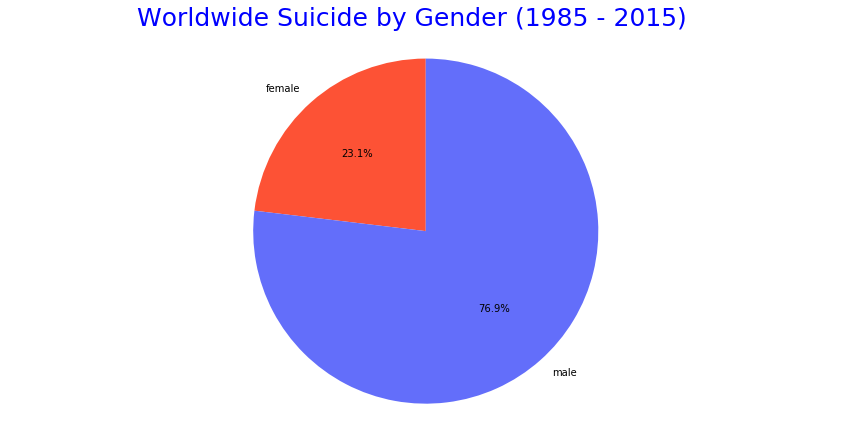

In [427]:
data_grp = data.groupby('sex').agg({"suicides_no": ['sum']})
data_grp.columns = ['total_suicide']
data_grp.reset_index(inplace=True)
fig, ax = plt.subplots(figsize=(15, 7))
plt.pie(data_grp['total_suicide'], labels=data_grp['sex'], autopct='%1.1f%%', startangle=90, colors=['#fd5235', '#636efa'])
ax.axis('equal')
plt.figtext(.5,.91,'Worldwide Suicide by Gender (1985 - 2015)', color='b', fontsize=25, ha='center')
plt.show()

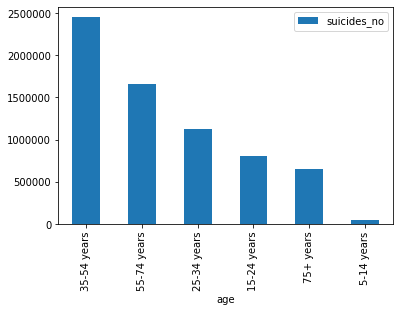

In [428]:
data.groupby('age')[['age','suicides_no']].sum().sort_values(by='suicides_no', ascending=False).plot(kind='bar')

Text(0.5, 1.0, 'Age vs Suicides')

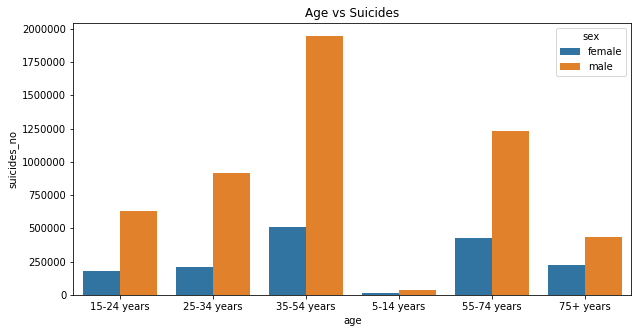

In [429]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'age', y='suicides_no', hue='sex', data=data.groupby(["age","sex"]).sum().reset_index()).set_title('Age vs Suicides')
# plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

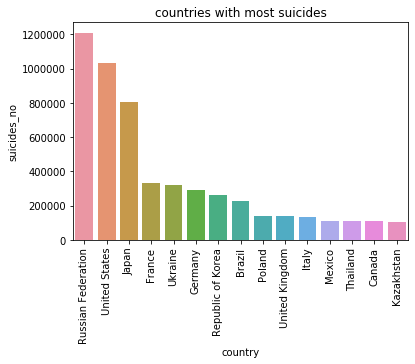

In [430]:
country_suicides = data[['country','suicides_no']].groupby(['country']).sum()
country_suicides = country_suicides.reset_index().sort_values(by='suicides_no', ascending=False)
top15 = country_suicides[:15]
sns.barplot(x='country', y='suicides_no', data=top15).set_title('countries with most suicides')
plt.xticks(rotation=90)

In [431]:
# Number of suicides in 1985
year_1985 = data[(data['year'] == 1985)]
year_1985 = year_1985.groupby('country')[['suicides_no']].sum().reset_index()

# Sorting values in ascending order
year_1985 = year_1985.sort_values(by='suicides_no', ascending=False)

# Styling output dataframe
year_1985.style.background_gradient(cmap='Purples', subset=['suicides_no'])

,country,suicides_no
46,United States,29446
24,Japan,23257
16,France,12501
41,Sri Lanka,5668
45,United Kingdom,5105
22,Italy,4759
8,Brazil,4228
36,Republic of Korea,3689
10,Canada,3258
43,Thailand,2982


In [432]:
#Number of suicides in 2016
year_2016 = data[(data['year'] == 2016)]
year_2016 = year_2016.groupby('country')[['suicides_no']].sum().reset_index()

# Sort values in ascending order
year_2016 = year_2016.sort_values(by='suicides_no', ascending=False)

# Styling output dataframe
year_2016.style.background_gradient(cmap='Oranges', subset=['suicides_no'])

,country,suicides_no
15,Thailand,4117
13,Romania,1953
11,Netherlands,1886
6,Hungary,1761
4,Czech Republic,1318
1,Austria,1201
14,Sweden,1130
8,Lithuania,822
2,Croatia,683
10,Mongolia,423


In [433]:
# Suicides number by year (high to low)
year_suicides = data.groupby('year')[['suicides_no']].sum().reset_index()
year_suicides.sort_values(by='suicides_no', ascending=False).style.background_gradient(cmap='Greens', subset=['suicides_no'])

,year,suicides_no
14,1999,256119
17,2002,256095
18,2003,256079
15,2000,255832
16,2001,250652
13,1998,249591
11,1996,246725
10,1995,243544
24,2009,243487
19,2004,240861


In [434]:
# Suicides number by age group
age_grp = data.groupby('age')[['suicides_no']].sum().reset_index()
age_grp.sort_values(by='suicides_no', ascending=False).style.background_gradient(cmap='Greys', subset=['suicides_no'])

,age,suicides_no
2,35-54 years,2452141
4,55-74 years,1658443
1,25-34 years,1123912
0,15-24 years,808542
5,75+ years,653118
3,5-14 years,52264


In [435]:
# Suicides number per 100k population
per100k = data.groupby(['country', 'year'])[['suicides_K']].sum().reset_index()
per100k.sort_values(by='suicides_K', ascending=False).head(20).style.background_gradient(cmap='Reds', subset=['suicides_K'])

,country,year,suicides_K
1255,Lithuania,1995,639.3
1256,Lithuania,1996,595.61
948,Hungary,1991,575
1260,Lithuania,2000,571.8
949,Hungary,1992,570.26
1261,Lithuania,2001,568.98
1752,Russian Federation,1994,567.64
1258,Lithuania,1998,566.36
1257,Lithuania,1997,565.44
1259,Lithuania,1999,561.53


### Top 15 countries with most suicides

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

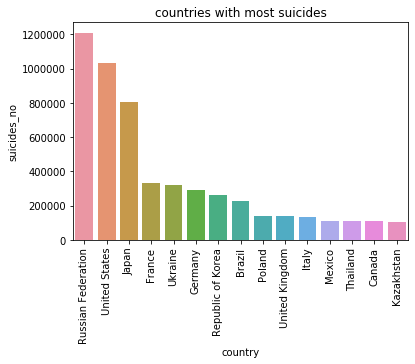

In [436]:
country_suicides = country_suicides.reset_index().sort_values(by='suicides_no', ascending=False)
top15 = country_suicides[:15]
sns.barplot(x='country', y='suicides_no', data=top15).set_title('countries with most suicides')
plt.xticks(rotation=90)

### Top 15 countries with least suicides

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

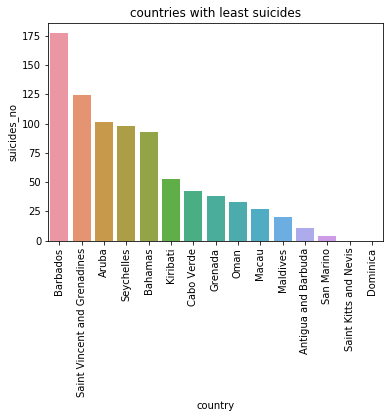

In [437]:
bottom15 = country_suicides[-15:]
sns.barplot(x='country', y='suicides_no', data=bottom15).set_title('countries with least suicides')
plt.xticks(rotation=90)


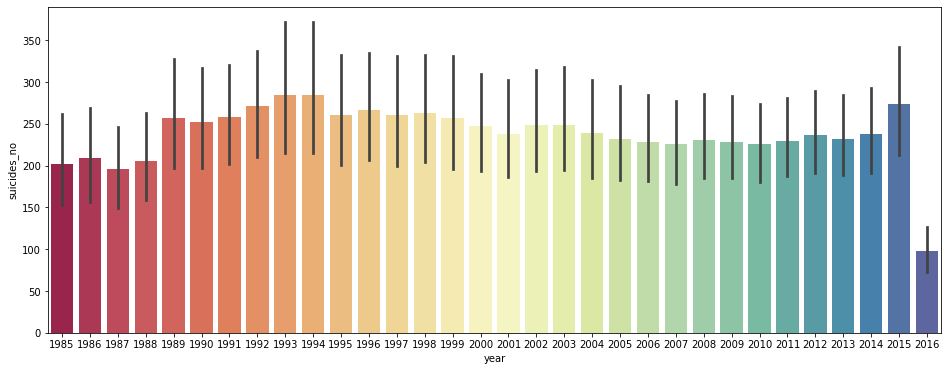

In [438]:
# Suicides number by year
f,ax = plt.subplots(1,1,figsize=(16,6))
ax = sns.barplot(x = data['year'], y = 'suicides_no',
                data=data, palette='Spectral')

### Suicides by year distribution

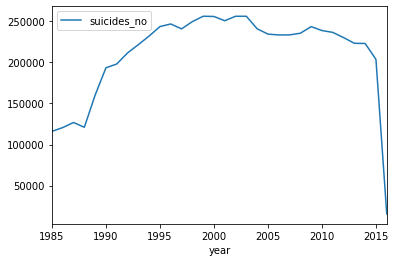

In [439]:
data[['year','suicides_no']].groupby(['year']).sum().plot()

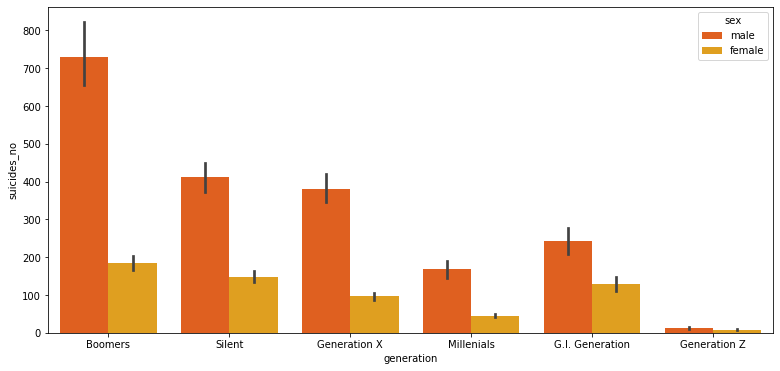

In [440]:
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = data['generation'], y = 'suicides_no',
                  hue='sex',data=data, palette='autumn')

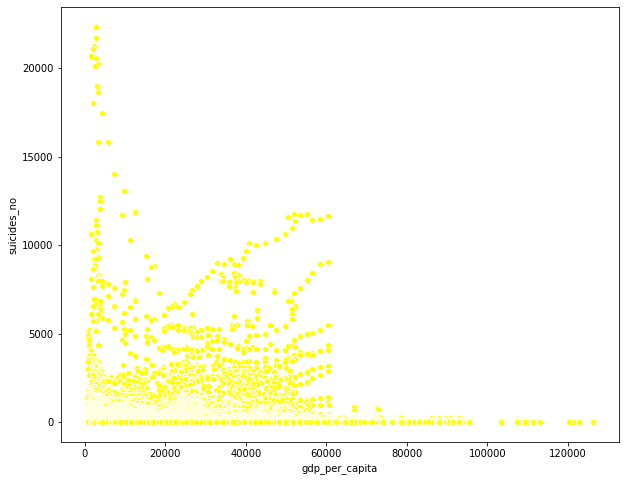

In [441]:
## Checking the relationship between gdp per capita and number of suicides
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="gdp_per_capita", y="suicides_no", data=data, color='yellow')

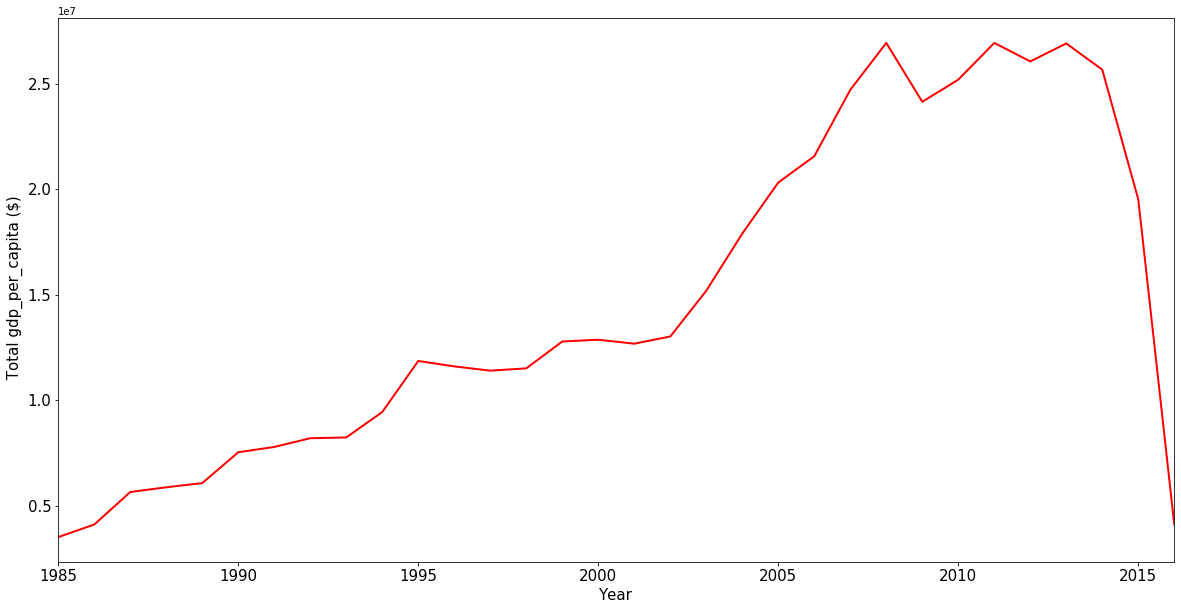

In [442]:
data_gdp = (data['gdp_per_capita'].groupby(data.year)).sum()
data_gdp.plot(figsize=(20,10), linewidth=2, fontsize=15,color='red')
plt.xlabel('Year', fontsize=15)
plt.ylabel(' Total gdp_per_capita ($)',fontsize=15)
plt.show()

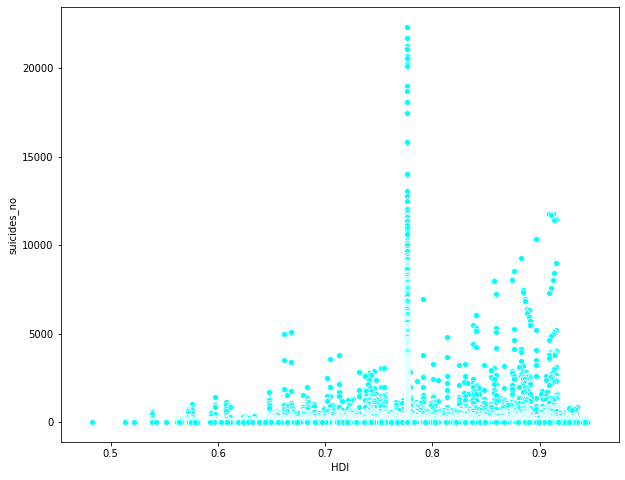

In [443]:
## Checking the relationship between Hdi and number of suicides
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="HDI", y="suicides_no", data=data, color='cyan')

## Machine Learning Algorithms

## Linear Regression

In [444]:
X = data[['country', 'sex', 'population', 'age', 'gdp_per_capita', 'generation']]
y = data['suicides_K']

In [445]:
#Transforming the categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [446]:
#Importing needed package for scaling
from sklearn.preprocessing import StandardScaler 

In [447]:
#Scaling our data 
sc = StandardScaler()
X[['population','gdp_per_capita']] = sc.fit_transform(X[['population','gdp_per_capita']])

In [448]:
#Importing needed package for splitting the dataset
from sklearn.model_selection import train_test_split

In [449]:
#Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [450]:
#Importing the Linear Regression algorithm 
from sklearn.linear_model import LinearRegression

In [451]:
#Initializing our Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [452]:
lr_y_pred = lr.predict(X_test)

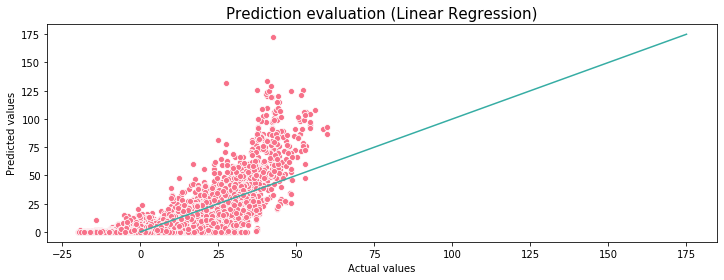

In [453]:
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(lr_y_pred, y_test, ax=ax, color=sns.husl_palette(10)[0])
sns.lineplot([0, 175], [0, 175], color=sns.husl_palette(10)[5], ax=ax)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation (Linear Regression)', size=15)
plt.show()

In [454]:
#Importing the Decision Tree algorithm 
from sklearn.tree import DecisionTreeRegressor

In [455]:
#Initializing our Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [456]:
#Predicting the test values
dt_y_pred = dt.predict(X_test)

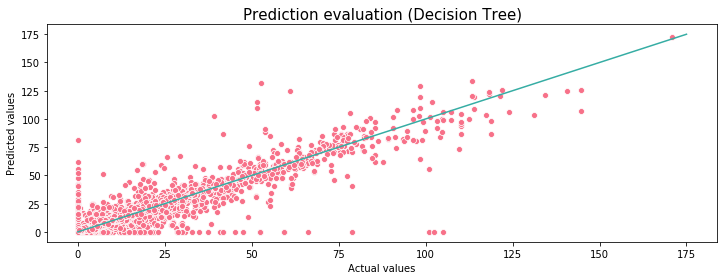

In [457]:
#Plotting the results
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(dt_y_pred, y_test, ax=ax, color=sns.husl_palette(10)[0])
sns.lineplot([0, 175], [0, 175], color=sns.husl_palette(10)[5], ax=ax)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation (Decision Tree)', size=15)
plt.show()

### Decision Tree Classifier

In [458]:
data['generation']=data['generation'].str.replace('Boomers','0')
data['generation']=data['generation'].str.replace('G.I. Generation','3')
data['generation']=data['generation'].str.replace('Generation X','1')
data['generation']=data['generation'].str.replace('Generation Z','2')
data['generation']=data['generation'].str.replace('Millenials','4')
data['generation']=data['generation'].str.replace('Silent','5')
data['gdp_for_year']=data['gdp_for_year'].str.replace(',','')
data['sex']=data['sex'].str.replace('female', '1')
data['sex']=data['sex'].str.replace('male', '0')
pd.to_numeric(data['generation'])
pd.to_numeric(data['sex'])
pd.to_numeric(data['gdp_for_year'])
print(data['generation'][:5])
print(data['sex'][:5])
print(data['gdp_for_year'][:5])

0    0
1    0
2    0
3    0
4    0
Name: generation, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: sex, dtype: object
0    395077301248
1    395531066563
2    306602673980
3    259708496267
4    195905767669
Name: gdp_for_year, dtype: object


In [459]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data.country = le.fit_transform(data.country)

In [460]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data.age = le.fit_transform(data.age)

In [461]:
data['fatality_rate']=np.where(data['suicides_K']>data['suicides_K'].mean(), 1, 0)

In [462]:
X = np.array(data.drop(['fatality_rate', 'suicides_K'], 1))
y = np.array(data.fatality_rate)


In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [464]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


DT = DecisionTreeClassifier(criterion="entropy", max_depth=7, max_leaf_nodes=30)
DT = DT.fit(X_train, y_train)
ydthat = DT.predict(X_test)

In [465]:
print('Accuracy =', DT.score(X_test, y_test))
print('Train Accuracy=', DT.score(X_train, y_train))

Accuracy = 0.902588066139468
Train Accuracy= 0.9109004313443566


### Random Forest Classifier

In [466]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [467]:
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.3)

In [468]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [469]:
print('R2 Score:', metrics.r2_score(test_y, pred_y))

R2 Score: 0.9741014436284231


In [470]:
metrics.r2_score(test_y, pred_y)

0.9741014436284231

### K-means

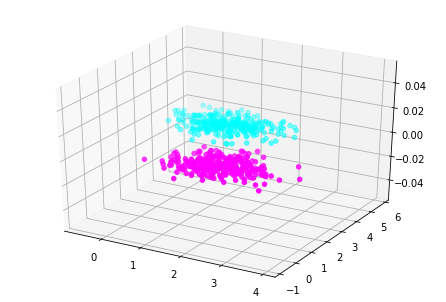

In [471]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
x = data.drop('suicides_no', axis=True)
y = data['suicides_no']
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=600,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)
y_kmeans = kmeans.predict(x)
x, y_kmeans = make_blobs(n_samples=600, centers=2, cluster_std=0.60, random_state=0)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], c=y_kmeans, cmap='cool')

In [472]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x, y_kmeans))

0.7107290505066528
